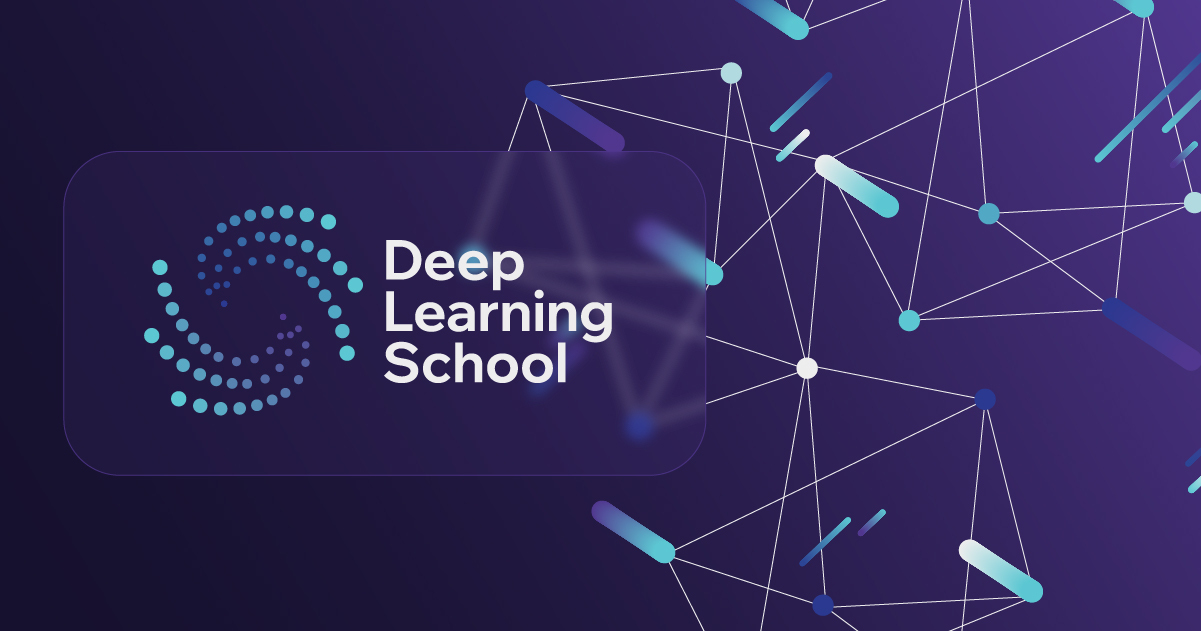

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

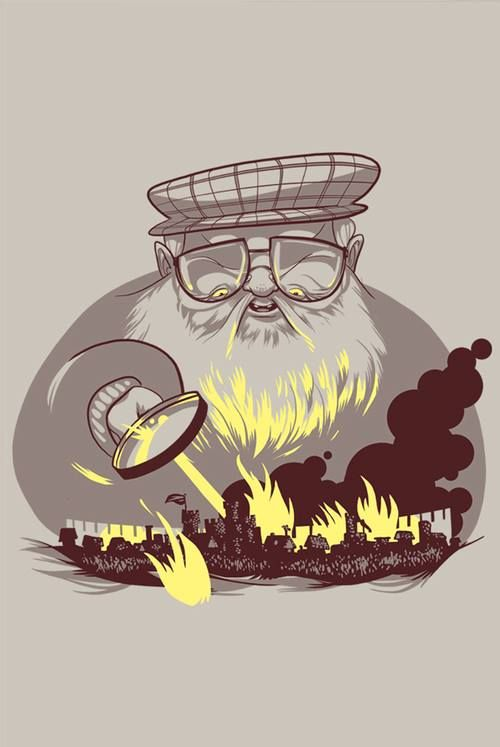

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
#!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
#!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [4]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [7]:
data.describe(include = ['float', 'int']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [8]:
# isna() преобразует NaN в True, sum() суммирует True по столбцам
data.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

<Axes: >

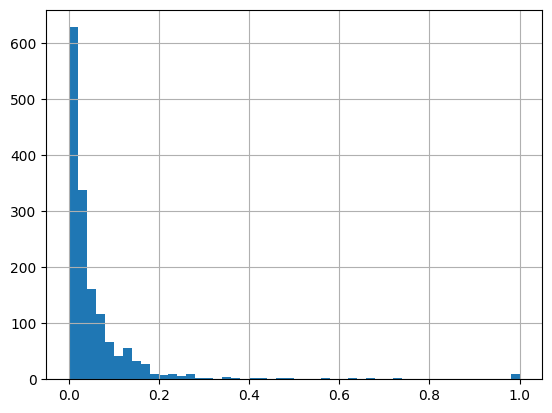

In [9]:
# во
data.popularity.hist(bins=50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


<Axes: >

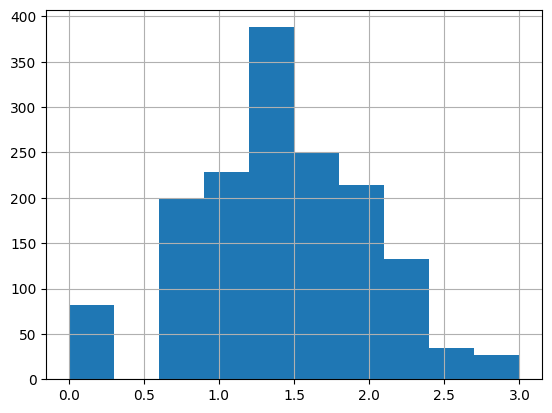

In [10]:
# Закинем признак "polularity" в таком виде
M=1000
data["popularity"] = np.log10(data["popularity"]*M+1)
data["popularity"].hist()

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

In [11]:
pd.qcut(data["popularity"], 4)

S.No
1         (1.81, 3.0]
2         (1.81, 3.0]
3         (1.81, 3.0]
4         (1.81, 3.0]
5       (1.388, 1.81]
            ...      
1553      (1.81, 3.0]
1554    (1.388, 1.81]
1555      (1.81, 3.0]
1556      (1.81, 3.0]
1557    (1.388, 1.81]
Name: popularity, Length: 1557, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.158] < (1.158, 1.388] < (1.388, 1.81] < (1.81, 3.0]]

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [12]:
data.numDeadRelations.value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
12       1
11       1
15       1
9        1
Name: count, dtype: int64

In [13]:
# вместо "numDeadRelations" используем "boolDeadRelations"
data['boolDeadRelations'] = data.numDeadRelations > 0
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,0.0,NaN,0,0,NaN,11,2.782724,0,True
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,1.0,1,1,97.0,1,2.952948,1,True
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,0,1,NaN,0,2.429039,1,False
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,0.0,1,1,23.0,0,2.267046,0,False
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,1.0,1,1,29.0,0,1.648148,1,False


Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [14]:
# NaN в признаке age трансформируем в признаки 'age_value' и 'age_no_data'
data['age_value'] = [0 if np.isnan(x) else x for x in data['age']] # ДОБАВЬТЕ ВАШ КОД
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

In [15]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,NaN,0,0,NaN,11,2.782724,0,True,0.0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,1.0,1,1,97.0,1,2.952948,1,True,97.0,0
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,0,1,NaN,0,2.429039,1,False,0.0,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,0.0,1,1,23.0,0,2.267046,0,False,23.0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,1.0,1,1,29.0,0,1.648148,1,False,29.0,0


Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

<Axes: >

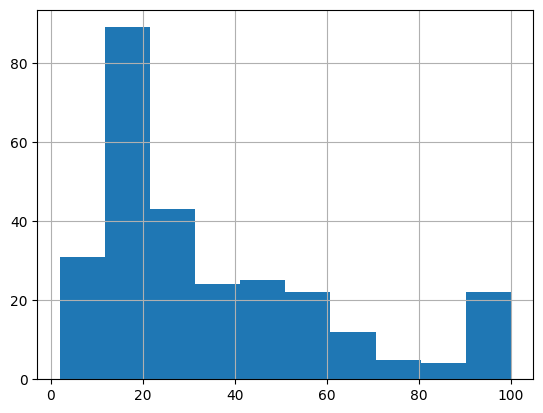

In [16]:
# посмотрим распределение возрастов отличное от нуля
data['age_value'][data['age_value'] != 0].hist()

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [17]:
data['culture'].value_counts(dropna=False)#...ДОБАВЬТЕ ВАШ КОД

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [18]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [19]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [20]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
      cultures_grouped_inverted.update({v:k})

cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [21]:
# информацию из 'culture' трансформируем в 'culture_grouped' и 'culture_no_data'
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [22]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0,0,NaN,11,2.782724,0,True,0.0,1,NaN
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,1,1,97.0,1,2.952948,1,True,97.0,0,the Isles and Rivers
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,0,1,NaN,0,2.429039,1,False,0.0,1,NaN
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,1,1,23.0,0,2.267046,0,False,23.0,0,NaN
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,1,1,29.0,0,1.648148,1,False,29.0,0,Dorne


In [23]:
data.culture_grouped = data.culture_grouped.fillna('culture_no_data')

In [24]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0,0,NaN,11,2.782724,0,True,0.0,1,culture_no_data
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,1,1,97.0,1,2.952948,1,True,97.0,0,the Isles and Rivers
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,0,1,NaN,0,2.429039,1,False,0.0,1,culture_no_data
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,1,1,23.0,0,2.267046,0,False,23.0,0,culture_no_data
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,1,1,29.0,0,1.648148,1,False,29.0,0,Dorne


Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

### Дальше работаем с другими категориальными признаками.

In [25]:
# NaN_values описывают количество значений NaN в различных категориальных признаках
data.describe(include = 'object').T.assign(NaN_values = data.select_dtypes('object').isna().sum())

,count,unique,top,freq,NaN_values
name,1557,1557,Melara Hetherspoon,1,0
title,717,195,Ser,306,840
culture,488,51,Northmen,94,1069
mother,18,16,Rhaenyra Targaryen,2,1539
father,22,19,Daemon Targaryen,2,1535
heir,21,20,Jaehaerys Targaryen,2,1536
house,1176,315,House Frey,89,381
spouse,200,186,Walder Frey,6,1357
culture_grouped,1557,12,culture_no_data,1069,0


Видим, что признаки mother, father, heir слабо представлены. Поэтому их в дальнейшем удалим.

In [26]:
data.spouse.value_counts()

spouse
Walder Frey         6
Craster             4
Alys Arryn          2
Kiera of Tyrosh     2
Stevron Frey        2
                   ..
Glover              1
Bronn               1
Jorah Mormont       1
Alerie Hightower    1
Davos Seaworth      1
Name: count, Length: 186, dtype: int64

In [27]:
# Заменяем значение spouse на то, сколько раз оно встречается, NaN заменяем на 0
data['spouse'] = data['spouse'].map(data['spouse'].value_counts()).fillna(0)
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0.0,...,0,0,NaN,11,2.782724,0,True,0.0,1,culture_no_data
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,1.0,...,1,1,97.0,1,2.952948,1,True,97.0,0,the Isles and Rivers
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,0.0,...,0,1,NaN,0,2.429039,1,False,0.0,1,culture_no_data
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,2.0,...,1,1,23.0,0,2.267046,0,False,23.0,0,culture_no_data
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,1.0,...,1,1,29.0,0,1.648148,1,False,29.0,0,Dorne


In [28]:
# уникальные значения домов
data.house.unique()

array([nan, 'House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerli

In [29]:
# Так как я не смотрел ни одной серии Игры Престолов я позволил себе попросить дипсик выделить ключевые слова, 
# чтобы распределить по домам. Использовал список выше.
great_houses_keywords = [
    'Stark', 'Lannister', 'Targaryen', 'Baratheon', 'Greyjoy', 
    'Tyrell', 'Martell', 'Arryn', 'Tully'
]

organizations_keywords = [
    "Night's Watch", "City Watch", 'Kingsguard', 'Queensguard', 
    'Maesters', 'Citadel', 'Alchemists', 'Faceless Men', 'Faith', 
    'Drowned men', 'Iron Bank', 'Golden Company', 'Stormcrows', 
    'Second Sons', 'Windblown', 'Brave Companions', 'Company of the Cat', 
    'Kingswood', 'Brotherhood', "R'hllor", 'Wise Masters', 'Good Masters', 
    'Khal', 'Summer Islands', 'Sea watch', 'Moon Brothers', 'Burned Men',
    'Stone Crows', 'Black Ears', 'Antler Men', 'Band of Nine', 'Pureborn',
    'Blacks'
]

historical_keywords = [
    'Blackfyre', 'Hoare', 'Reyne', 'Darklyn', 'Mudd', 'Strong', 
    'Lothston', 'Toyne', 'Gardener', 'Durrandon', 'Justman'
]

# Функция для категоризации
def categorize_house(house_name):
    house_str = str(house_name)
    
    # Great Houses
    if any(keyword in house_str for keyword in great_houses_keywords):
        return 'Great Houses'
    
    # Organizations
    if any(keyword in house_str for keyword in organizations_keywords):
        return 'Organizations'
    
    # Historical Factions
    if any(keyword in house_str for keyword in historical_keywords):
        return 'Historical Factions'
    
    # Regional Houses (все остальные с "House")
    if 'House' in house_str:
        return 'Regional Houses'
    
    # Остальное в No_data
    return 'house_no_data'

# Применяем категоризацию
data['houses_grouped'] = data['house'].apply(categorize_house)



In [30]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,houses_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0.0,...,0,NaN,11,2.782724,0,True,0.0,1,culture_no_data,house_no_data
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,1.0,...,1,97.0,1,2.952948,1,True,97.0,0,the Isles and Rivers,Regional Houses
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,0.0,...,1,NaN,0,2.429039,1,False,0.0,1,culture_no_data,Regional Houses
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,2.0,...,1,23.0,0,2.267046,0,False,23.0,0,culture_no_data,Great Houses
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,1.0,...,1,29.0,0,1.648148,1,False,29.0,0,Dorne,Regional Houses


In [31]:
# уникальные значения титулов
data.title.unique()

array([nan, 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackc

In [32]:
# Так как я не смотрел ни одной серии Игры Престолов я позволил себе попросить дипсик выделить ключевые слова, 
# чтобы распределить по домам

# Высшая аристократия
highnesses_keywords = ['king', 'queen', 'prince', 'princess', 'royal', 'throne', 'dragonstone', 'dorne']
# Лорды и правители земель
lords_keywords = ['lord', 'lady', 'of the', 'paramount', 'reaper', 'ruler', 'marya', 'dowager']
# Рыцари и военные
knights_military_keywords = ['ser', 'knight', 'captain', 'commander', 'ranger', 'bloodrider', 'khal', 
                             'sword', 'oarmaster', 'guard']
# Мастера и ученые
masters_keywords = ['maester', 'archmaester', 'wisdom', 'scholar']
# Религиозные деятели
religion_keywords = ['septon', 'septa', 'priest', 'grace', 'gods']
# Управляющие и служители
managers_keywords = ['hand', 'steward', 'castellan', 'cupbearer', 'seneschal', 'proctor', 'gaoler']
# Правители городов и замков
geographical_keywords = ['winterfell', 'casterly', 'harrenhal', 'riverrun', 'highgarden', 'rock', 
                         'eyrie', 'hearth', 'isle', 'point', 'hill', 'vale', 'den', 'hall', 'watch']
# Торговцы и простолюдины
salesman_keywords = ['goodman', 'goodwife', 'tradesman', 'master', 'merchant']

# Функция для категоризации
def categorize_title(title_name):
    title_str = str(title_name)
    
    # High aristocracy
    if any(keyword in title_str for keyword in highnesses_keywords):
        return 'High aristocracy'
    
    # Lords and Landlords
    if any(keyword in title_str for keyword in lords_keywords):
        return 'Lords and Landlords'
    
    # Knights and military
    if any(keyword in title_str for keyword in knights_military_keywords):
        return 'Knights and military'

    # Masters and scientists
    if any(keyword in title_str for keyword in masters_keywords):
        return 'Masters and scientists'

    # Religious
    if any(keyword in title_str for keyword in religion_keywords):
        return 'Religious'
    
    # Managers
    if any(keyword in title_str for keyword in managers_keywords):
        return 'Managers'

    # Rulers of cities and castles
    if any(keyword in title_str for keyword in geographical_keywords):
        return 'Rulers of cities and castles'

    # Merchants and commoners
    if any(keyword in title_str for keyword in geographical_keywords):
        return 'Merchants and commoners'
           
    # NaN
    if 'nan' in title_str:
        return 'title_no_data'
    
    # Остальное в Special_titles
    return 'Special_titles'


# Применяем категоризацию
data['titles_grouped'] = data['title'].str.lower().apply(categorize_title)

In [33]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,houses_grouped,titles_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0.0,...,NaN,11,2.782724,0,True,0.0,1,culture_no_data,house_no_data,title_no_data
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,1.0,...,97.0,1,2.952948,1,True,97.0,0,the Isles and Rivers,Regional Houses,Lords and Landlords
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,0.0,...,NaN,0,2.429039,1,False,0.0,1,culture_no_data,Regional Houses,Knights and military
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,2.0,...,23.0,0,2.267046,0,False,23.0,0,culture_no_data,Great Houses,High aristocracy
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,1.0,...,29.0,0,1.648148,1,False,29.0,0,Dorne,Regional Houses,Special_titles


In [34]:
# Заменяем True и False на 1 и 0 в boolDeadRelations
data.boolDeadRelations = data.boolDeadRelations.astype('int')
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,houses_grouped,titles_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0.0,...,NaN,11,2.782724,0,1,0.0,1,culture_no_data,house_no_data,title_no_data
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,1.0,...,97.0,1,2.952948,1,1,97.0,0,the Isles and Rivers,Regional Houses,Lords and Landlords
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,0.0,...,NaN,0,2.429039,1,0,0.0,1,culture_no_data,Regional Houses,Knights and military
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,2.0,...,23.0,0,2.267046,0,0,23.0,0,culture_no_data,Great Houses,High aristocracy
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,1.0,...,29.0,0,1.648148,1,0,29.0,0,Dorne,Regional Houses,Special_titles


**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [35]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
culture_grouped,1557,12,culture_no_data,1069
houses_grouped,1557,5,Regional Houses,738
titles_grouped,1557,9,title_no_data,840


In [36]:
# Количество уникальнх значений в каждом столбце
data.nunique()

name                 1557
title                 195
male                    2
culture                51
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                  5
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
numDeadRelations       14
popularity            117
isAlive                 2
boolDeadRelations       2
age_value              72
age_no_data             2
culture_grouped        12
houses_grouped          5
titles_grouped          9
dtype: int64

In [37]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ['float', 'int']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique()).assign(NaN_values = data.select_dtypes(['int', 'float']).isna().sum())

,count,min,max,N_unique_values,NaN_values
male,1557.0,0.0,1.000000,2,0
dateOfBirth,279.0,-25.0,299.000000,105,1278
spouse,1557.0,0.0,6.000000,5,0
book1,1557.0,0.0,1.000000,2,0
book2,1557.0,0.0,1.000000,2,0
book3,1557.0,0.0,1.000000,2,0
book4,1557.0,0.0,1.000000,2,0
book5,1557.0,0.0,1.000000,2,0
isAliveMother,18.0,0.0,1.000000,2,1539
isAliveFather,22.0,0.0,1.000000,2,1535


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [38]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

#print(data.groupby('age_no_data', dropna = False)['isAlive'].mean())
print(pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False))

                   mean   count
                isAlive isAlive
isAliveSpouse                  
0.0            0.619048      42
1.0            0.753165     158
NaN            0.786293    1357


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [39]:
# Выделяем сгруппированные признаки в один датафрейм, для дальнейшего энкодинга
data_cat = data[['culture_grouped', 'houses_grouped', 'titles_grouped']]
data_cat.head()

,culture_grouped,houses_grouped,titles_grouped
S.No,,,
1,culture_no_data,house_no_data,title_no_data
2,the Isles and Rivers,Regional Houses,Lords and Landlords
3,culture_no_data,Regional Houses,Knights and military
4,culture_no_data,Great Houses,High aristocracy
5,Dorne,Regional Houses,Special_titles


In [40]:
# Энкодим data_cat
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
OH_Enc = OneHotEncoder(sparse_output=False)  # sparse_output=False для обычного массива

# Применяем и преобразуем в DataFrame
data_encoded = OH_Enc.fit_transform(data_cat)
data_encoded_df = pd.DataFrame(data_encoded, columns=OH_Enc.get_feature_names_out())

# признаки после энкодинга
data_encoded_df.head()

,culture_grouped_Dorne,culture_grouped_Essos Nations,culture_grouped_Old Nations,culture_grouped_Other Nations,culture_grouped_culture_no_data,culture_grouped_the Iron Islands,culture_grouped_the Isles and Rivers,culture_grouped_the Mountain and the Vale,culture_grouped_the North,culture_grouped_the Reach,...,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles,titles_grouped_title_no_data
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Объединяем существующий датафрейм data и датафрейм с признакамипосле энкодинга
Data_encoded = pd.concat([
    data.reset_index(drop=True), 
    data_encoded_df.reset_index(drop=True)
], axis=1)

Data_encoded.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles,titles_grouped_title_no_data
0,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# выведем список признаков, для того чтобы выбрать те, которые будем удалять
Data_encoded.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive', 'boolDeadRelations', 'age_value', 'age_no_data',
       'culture_grouped', 'houses_grouped', 'titles_grouped',
       'culture_grouped_Dorne', 'culture_grouped_Essos Nations',
       'culture_grouped_Old Nations', 'culture_grouped_Other Nations',
       'culture_grouped_culture_no_data', 'culture_grouped_the Iron Islands',
       'culture_grouped_the Isles and Rivers',
       'culture_grouped_the Mountain and the Vale',
       'culture_grouped_the North', 'culture_grouped_the Reach',
       'culture_grouped_the Rock', 'culture_grouped_the Stormlands',
       'houses_grouped_Great Houses', 'houses_grouped_Historical Factions',
       'houses_grouped_Organizations', 'houses

In [43]:
"""СОСТАВЛЯЕМ ДРОП ЛИСТ ПРИЗНАКОВ"""

# name - не несет смысловой информации для модели
# title, culture, house - были сгруппированы 
# mother, father, heir 'isAliveMother', 'isAliveFather', 'isAliveHeir' - 1.5% не NaN имеет смысл удалить
# isAliveSpouse - значения 1-жив, 0-мертв. Не понятно как закодировать NaN.
# age, numDeadRelations - преобразованы
# 'culture_grouped', 'houses_grouped', 'titles_grouped' - использовался энкодинг


drop_list = ['name', 'title', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age', 'numDeadRelations', 'culture_grouped', 'houses_grouped', 'titles_grouped']

In [44]:
# дропаем признаки по дроп листу и получаем результирующий датафрейм
result_df = Data_encoded.drop(drop_list, axis=1)
result_df.head()

,male,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,...,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles,titles_grouped_title_no_data
0,1,0.0,0,0,0,0,0,0,0,2.782724,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,1,1,1,1,1,1,1,2.952948,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0,0,0,1,0,0,1,2.429039,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.0,0,0,0,0,0,1,1,2.267046,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0,0,0,1,0,1,1,1.648148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

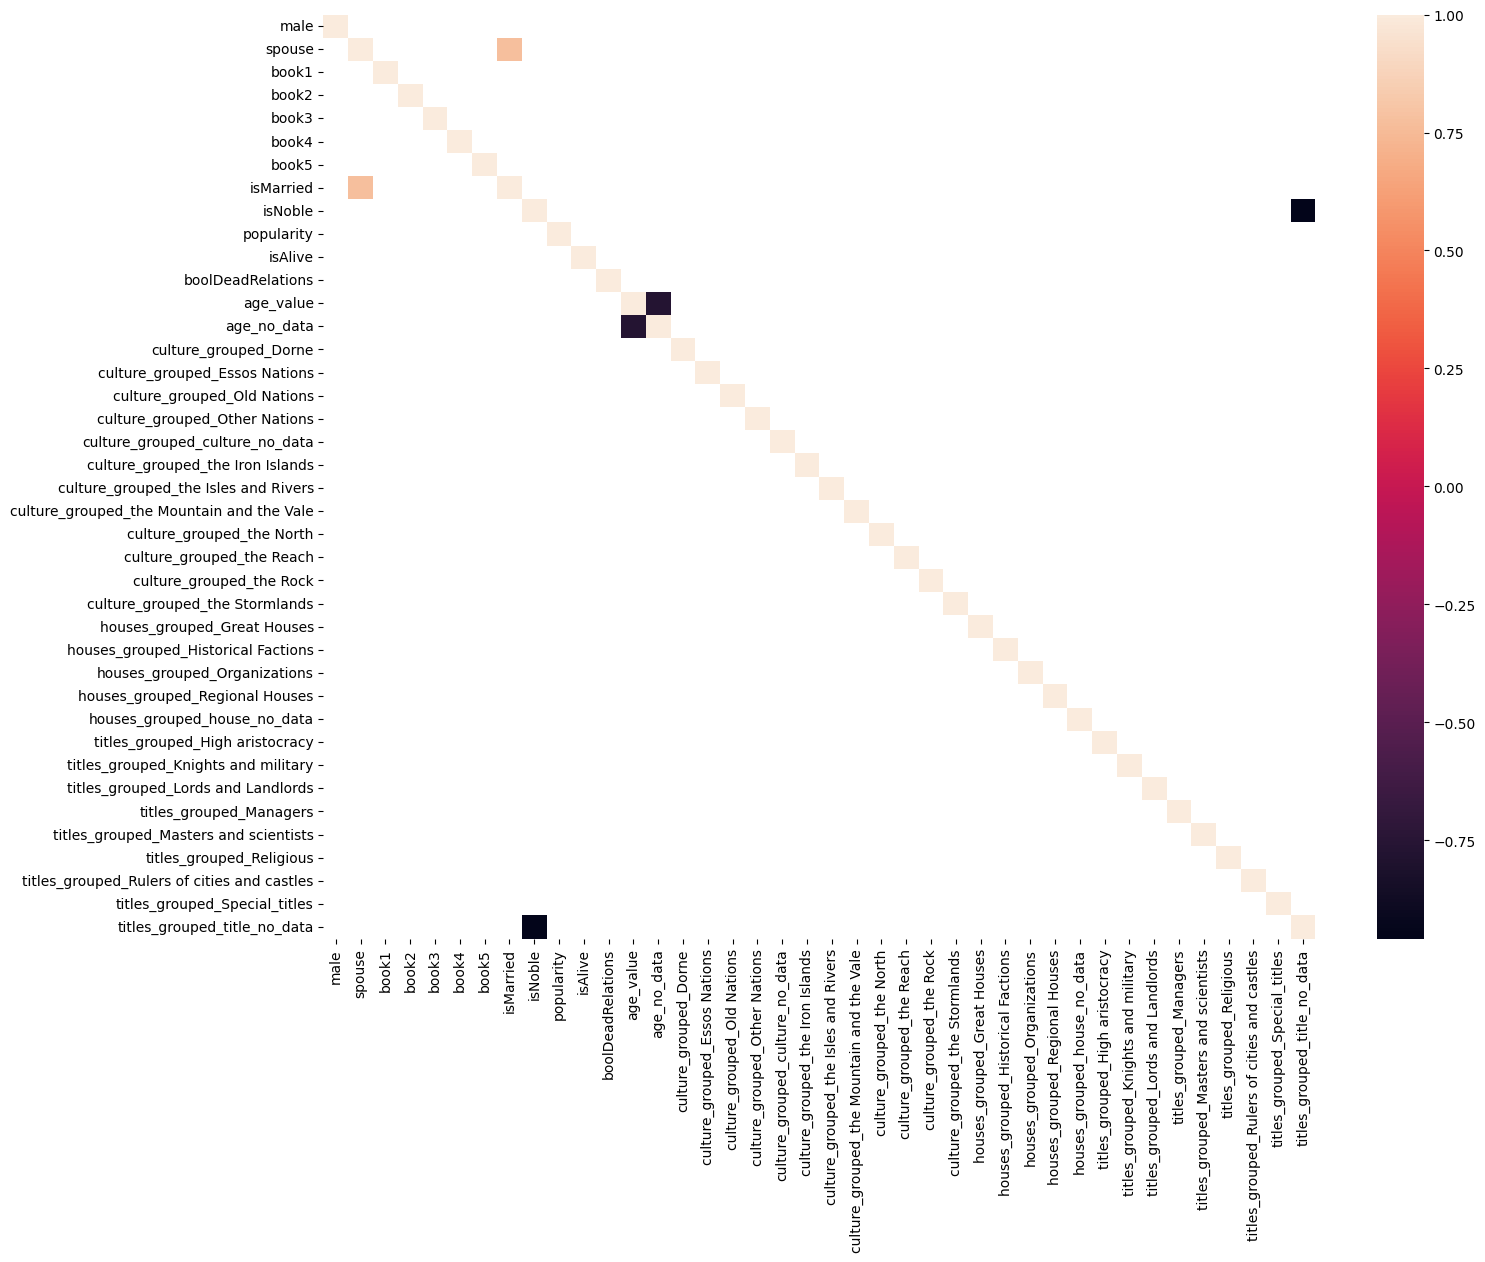

In [45]:
# строим матрицу корреляции, цветом отображаем корреляцию по модулю выше 0.7
plt.figure(figsize=(16, 12))
corr_matrix = result_df.corr()
mask = np.abs(corr_matrix) < 0.7 
sns.heatmap(result_df.corr(), mask=mask)

In [46]:
# Создаем список для хранения пар признаков с высокой корреляцией
high_corr_pairs = []

# Проходим по верхней треугольной матрице (исключая диагональ)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        # Проверяем корреляцию по модулю
        if abs(corr_value) > 0.7:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_corr_pairs.append({
                'feature1': feature1,
                'feature2': feature2,
                'correlation': corr_value
            })

# Сортируем пары по убыванию абсолютного значения корреляции
high_corr_pairs.sort(key=lambda x: abs(x['correlation']), reverse=True)

# выведем пары с высокой корреляцией
high_corr_pairs

[{'feature1': 'isNoble',
  'feature2': 'titles_grouped_title_no_data',
  'correlation': np.float64(-0.9580782790036598)},
 {'feature1': 'spouse',
  'feature2': 'isMarried',
  'correlation': np.float64(0.7779319429079157)},
 {'feature1': 'age_value',
  'feature2': 'age_no_data',
  'correlation': np.float64(-0.7720810724133647)}]

### Размышления
Удаляем titles_grouped_title_no_data, так как у тех у кого нет титула, те почти всегда имеют значение isNoble=0
Удаляем spouse. Изначально там хранилось имя супруга. А после обработки там хранилось сколько раз этот человек встречался в этом столбце.
т.е. у скольких персонажей он был супругом (возможно эта информация будет полезна модели для небольшого улучшения работы модели). Но для начального пайплайна наличие isMarried без spouse кажется достаточным.
'age_value', 'age_no_data' не удаляем. Потому что если в age_value хранится известных возраст, если он равен 0 то там был NaN и age_no_data=1 поэтому и появляется высокая корреляция. Эти признаки дополняют друг друга.

In [47]:
# Удаляем titles_grouped_title_no_data и spouse

result_df = result_df.drop(['titles_grouped_title_no_data', 'spouse'], axis=1)
result_df.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,isAlive,...,houses_grouped_Regional Houses,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles
0,1,0,0,0,0,0,0,0,2.782724,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,1,2.952948,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,1,0,0,1,2.429039,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,1,1,2.267046,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,1,1,1.648148,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [48]:
# Влияние признаков на целевую переменную
corr_matrix.isAlive.iloc[corr_matrix.isAlive.abs().argsort()[::-1]]

isAlive                                        1.000000
book4                                          0.284014
popularity                                    -0.226544
age_value                                     -0.181938
boolDeadRelations                             -0.178177
culture_grouped_Old Nations                   -0.173409
male                                          -0.148290
titles_grouped_High aristocracy               -0.129489
age_no_data                                    0.113629
book1                                         -0.112468
houses_grouped_Great Houses                   -0.095515
houses_grouped_Regional Houses                 0.088348
houses_grouped_Organizations                  -0.072351
spouse                                        -0.069982
culture_grouped_the Iron Islands               0.064933
culture_grouped_the Rock                      -0.063857
isNoble                                       -0.060572
titles_grouped_Masters and scientists          0

<Axes: >

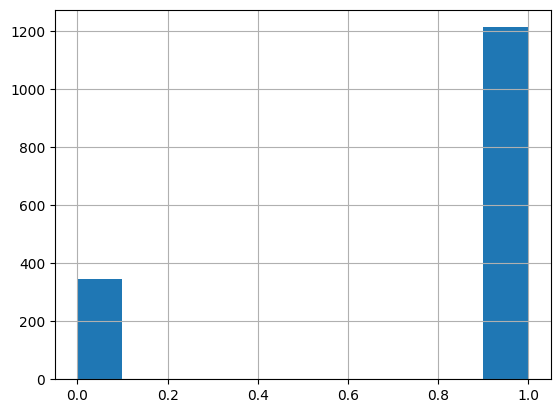

In [49]:
# Построим гистрограмму по isAlive
result_df.isAlive.hist()

### Размышления
Виден перекос в сторону выживших поэтому при делении на train и val будем делать стратификацию

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [50]:
X = result_df.drop(['isAlive'], axis=1)
y = result_df.isAlive

In [51]:
X.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,boolDeadRelations,...,houses_grouped_Regional Houses,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles
0,1,0,0,0,0,0,0,0,2.782724,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,1,2.952948,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,1,0,0,1,2.429039,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,1,1,2.267046,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,1,1,1.648148,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: isAlive, dtype: int64

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [55]:
X_train.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,boolDeadRelations,...,houses_grouped_Regional Houses,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles
945,1,0,1,1,1,0,0,0,2.005757,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0,0,0,0,0,0,0,0,0.637938,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0,0,0,1,0,0,0,1,0.637938,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,1,0,0,0,1,1,1,1,2.208267,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
712,1,0,0,0,0,0,0,1,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
X_val.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,boolDeadRelations,...,houses_grouped_Regional Houses,houses_grouped_house_no_data,titles_grouped_High aristocracy,titles_grouped_Knights and military,titles_grouped_Lords and Landlords,titles_grouped_Managers,titles_grouped_Masters and scientists,titles_grouped_Religious,titles_grouped_Rulers of cities and castles,titles_grouped_Special_titles
1128,0,0,0,0,1,1,0,1,1.248523,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,1,1,0,0,1,1,0,1,1.443355,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0,0,0,0,0,1,0,0,0.885868,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,1,0,1,1,1,0,0,0,1.831803,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,1,0,0,0,0,0,0,0,0.637938,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y_train.head()

945    1
258    1
152    1
310    0
712    1
Name: isAlive, dtype: int64

In [58]:
y_val.head()

1128    1
1082    1
764     1
1432    1
806     1
Name: isAlive, dtype: int64

<Axes: >

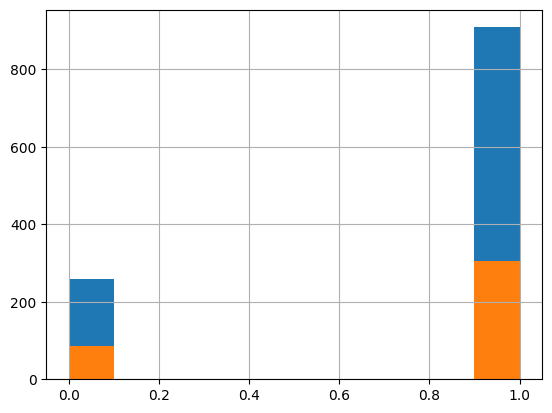

In [59]:
# смотрим стратификацию train и val
y_train.hist()
y_val.hist()

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold


Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [61]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
n_jobs = -2

# Шаг 1. создание модели LogReg
LogReg = LogisticRegression(random_state=42)
param_grid_LogReg = {'penalty': ['l1', 'l2', 'elasticnet', None], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'], 'max_iter': [100, 500, 1000]}

grid_search_LogReg = GridSearchCV(param_grid=param_grid_LogReg, estimator=LogReg, cv=cv_strategy, scoring='accuracy', n_jobs=n_jobs)

# Шаг 2. обучение модели
Log_reg_estim = grid_search_LogReg.fit(X_train, y_train)
Log_reg_estim = Log_reg_estim.best_estimator_

# Шаг 1. создание модели RandomForrest
RFC = RandomForestClassifier(random_state=42)
param_grid_RFC = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 15, 20],
                  'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 3],
                   'max_features': ['sqrt', 'log2', 0.7, 0.8]}

grid_search_RFC = GridSearchCV(param_grid=param_grid_RFC, estimator=RFC, cv=cv_strategy, scoring='accuracy', n_jobs=n_jobs)

# Шаг 2. обучение модели
RFC_estim = grid_search_RFC.fit(X_train, y_train)
RFC_estim = RFC_estim.best_estimator_

# Шаг 1. создание модели SVC
SV_C = SVC(random_state=42)
param_grid_SVC = { 'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'],
                   'gamma': ['scale', 'auto', 0.1, 0.01],'degree': [2, 3, 4]}

grid_search_SVC = GridSearchCV(param_grid=param_grid_SVC, estimator=SV_C, cv=cv_strategy, scoring='accuracy', n_jobs=n_jobs)

# Шаг 2. обучение модели
SVC_estim = grid_search_SVC.fit(X_train, y_train)
SVC_estim = SVC_estim.best_estimator_

# Шаг 1. создание модели NB
NB = GaussianNB()
param_grid_NB = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

grid_search_NB = GridSearchCV(param_grid=param_grid_NB, estimator=NB, cv=cv_strategy, scoring='accuracy', n_jobs=n_jobs)

# Шаг 2. обучение модели
NB_estim = grid_search_NB.fit(X_train, y_train)
NB_estim = NB_estim.best_estimator_

Estims = [Log_reg_estim, RFC_estim, SVC_estim, NB_estim]

C:\Users\Ivan Tatsenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
630 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ivan Tatsenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ivan Tatsenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

In [64]:
Estims[1]

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [66]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [76]:
from sklearn.metrics import accuracy_score
accuracies = []
for i in Estims:
    # Шаг 3. Предсказание на тестовых данных
    y_pred = i.predict(X_val)
    
    # Шаг 4. Оценка предсказания по метрике accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    print(type(i).__name__,"Accuracy : %.4f" % accuracy)

best_estimator = Estims[np.argmax(accuracies)]
best_estimator

LogisticRegression Accuracy : 0.7923
RandomForestClassifier Accuracy : 0.8026
SVC Accuracy : 0.7872
GaussianNB Accuracy : 0.7385


,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [77]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
data_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [79]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [92]:
data_test.describe(include = 'object').T.assign(NaN_values = data_test.select_dtypes('object').isna().sum())

,count,unique,top,freq,NaN_values
name,389,389,Tytos Lannister,1,0
title,221,109,Ser,78,168
culture,189,48,Northmen,30,200
mother,3,3,Dyanna Dayne,1,386
father,4,4,Maekar I Targaryen,1,385
heir,2,2,Duncan Targaryen,1,387
house,343,137,House Targaryen,22,46
spouse,76,75,Tyrion Lannister,2,313


In [93]:
data.describe(include = ['float', 'int']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique()).assign(NaN_values = data.select_dtypes(['int', 'float']).isna().sum())

,count,min,max,N_unique_values,NaN_values
male,1557.0,0.0,1.000000,2,0
dateOfBirth,279.0,-25.0,299.000000,105,1278
spouse,1557.0,0.0,6.000000,5,0
book1,1557.0,0.0,1.000000,2,0
book2,1557.0,0.0,1.000000,2,0
book3,1557.0,0.0,1.000000,2,0
book4,1557.0,0.0,1.000000,2,0
book5,1557.0,0.0,1.000000,2,0
isAliveMother,18.0,0.0,1.000000,2,1539
isAliveFather,22.0,0.0,1.000000,2,1535


In [91]:
data_test.isna().sum()

name                  0
title               168
male                  0
culture             200
dateOfBirth         235
mother              386
father              385
heir                387
house                46
spouse              313
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isAliveMother       386
isAliveFather       385
isAliveHeir         387
isAliveSpouse       313
isMarried             0
isNoble               0
age                 235
numDeadRelations      0
popularity            0
dtype: int64

### Пайплайн обработки датафрейма

In [95]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,


In [94]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278
data_test.loc[1685, 'age'] = 0
data_test.loc[1869, 'dateOfBirth'] = 299
data_test.loc[1869, 'age'] = 0
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

In [97]:
# Тут записаны словари для группировки признаков cultures, house, title
# и ещё функции для группировки house и title
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

# инвертируем cultures_grouped
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
      cultures_grouped_inverted.update({v:k})

great_houses_keywords = [
    'Stark', 'Lannister', 'Targaryen', 'Baratheon', 'Greyjoy', 
    'Tyrell', 'Martell', 'Arryn', 'Tully'
]

organizations_keywords = [
    "Night's Watch", "City Watch", 'Kingsguard', 'Queensguard', 
    'Maesters', 'Citadel', 'Alchemists', 'Faceless Men', 'Faith', 
    'Drowned men', 'Iron Bank', 'Golden Company', 'Stormcrows', 
    'Second Sons', 'Windblown', 'Brave Companions', 'Company of the Cat', 
    'Kingswood', 'Brotherhood', "R'hllor", 'Wise Masters', 'Good Masters', 
    'Khal', 'Summer Islands', 'Sea watch', 'Moon Brothers', 'Burned Men',
    'Stone Crows', 'Black Ears', 'Antler Men', 'Band of Nine', 'Pureborn',
    'Blacks'
]

historical_keywords = [
    'Blackfyre', 'Hoare', 'Reyne', 'Darklyn', 'Mudd', 'Strong', 
    'Lothston', 'Toyne', 'Gardener', 'Durrandon', 'Justman'
]

# Функция для категоризации
def categorize_house(house_name):
    house_str = str(house_name)
    
    # Great Houses
    if any(keyword in house_str for keyword in great_houses_keywords):
        return 'Great Houses'
    
    # Organizations
    if any(keyword in house_str for keyword in organizations_keywords):
        return 'Organizations'
    
    # Historical Factions
    if any(keyword in house_str for keyword in historical_keywords):
        return 'Historical Factions'
    
    # Regional Houses (все остальные с "House")
    if 'House' in house_str:
        return 'Regional Houses'
    
    # Остальное в No_data
    return 'house_no_data'

# Высшая аристократия
highnesses_keywords = ['king', 'queen', 'prince', 'princess', 'royal', 'throne', 'dragonstone', 'dorne']
# Лорды и правители земель
lords_keywords = ['lord', 'lady', 'of the', 'paramount', 'reaper', 'ruler', 'marya', 'dowager']
# Рыцари и военные
knights_military_keywords = ['ser', 'knight', 'captain', 'commander', 'ranger', 'bloodrider', 'khal', 
                             'sword', 'oarmaster', 'guard']
# Мастера и ученые
masters_keywords = ['maester', 'archmaester', 'wisdom', 'scholar']
# Религиозные деятели
religion_keywords = ['septon', 'septa', 'priest', 'grace', 'gods']
# Управляющие и служители
managers_keywords = ['hand', 'steward', 'castellan', 'cupbearer', 'seneschal', 'proctor', 'gaoler']
# Правители городов и замков
geographical_keywords = ['winterfell', 'casterly', 'harrenhal', 'riverrun', 'highgarden', 'rock', 
                         'eyrie', 'hearth', 'isle', 'point', 'hill', 'vale', 'den', 'hall', 'watch']
# Торговцы и простолюдины
salesman_keywords = ['goodman', 'goodwife', 'tradesman', 'master', 'merchant']

# Функция для категоризации
def categorize_title(title_name):
    title_str = str(title_name)
    
    # High aristocracy
    if any(keyword in title_str for keyword in highnesses_keywords):
        return 'High aristocracy'
    
    # Lords and Landlords
    if any(keyword in title_str for keyword in lords_keywords):
        return 'Lords and Landlords'
    
    # Knights and military
    if any(keyword in title_str for keyword in knights_military_keywords):
        return 'Knights and military'

    # Masters and scientists
    if any(keyword in title_str for keyword in masters_keywords):
        return 'Masters and scientists'

    # Religious
    if any(keyword in title_str for keyword in religion_keywords):
        return 'Religious'
    
    # Managers
    if any(keyword in title_str for keyword in managers_keywords):
        return 'Managers'

    # Rulers of cities and castles
    if any(keyword in title_str for keyword in geographical_keywords):
        return 'Rulers of cities and castles'

    # Merchants and commoners
    if any(keyword in title_str for keyword in geographical_keywords):
        return 'Merchants and commoners'
           
    # NaN
    if 'nan' in title_str:
        return 'title_no_data'
    
    # Остальное в Special_titles
    return 'Special_titles'

drop_list = ['name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'isAliveMother',
             'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age', 'numDeadRelations', 'culture_grouped', 
             'houses_grouped', 'titles_grouped']


In [98]:
def data_pipe(data):
    M=1000
    data["popularity"] = np.log10(data["popularity"]*M+1)
    
    data['boolDeadRelations'] = data.numDeadRelations > 0
    data.boolDeadRelations = data.boolDeadRelations.astype('int')
    
    data['age_value'] = [0 if np.isnan(x) else x for x in data['age']] 
    data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

    data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)
    data.culture_grouped = data.culture_grouped.fillna('culture_no_data')

    data['spouse'] = data['spouse'].map(data['spouse'].value_counts()).fillna(0)
    
    data['houses_grouped'] = data['house'].apply(categorize_house)

    data['titles_grouped'] = data['title'].str.lower().apply(categorize_title)
    
    data_cat = data[['culture_grouped', 'houses_grouped', 'titles_grouped']]

    OH_Enc = OneHotEncoder(sparse_output=False)  # sparse_output=False для обычного массива

    # Применяем и преобразуем в DataFrame
    data_encoded = OH_Enc.fit_transform(data_cat)
    data_encoded_df = pd.DataFrame(data_encoded, columns=OH_Enc.get_feature_names_out())
    
    Data_encoded = pd.concat([data.reset_index(drop=True), data_encoded_df.reset_index(drop=True)], axis=1)
    
    result_df = Data_encoded.drop(drop_list, axis=1)
    result_df = result_df.drop(['titles_grouped_title_no_data', 'spouse'], axis=1)

    return result_df
    

In [100]:
X_test = data_pipe(data_test)

In [109]:
best_estimator.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [112]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF
Estims = [Log_reg_estim, RFC_estim, SVC_estim, NB_estim]

In [132]:
submission = Log_reg_estim.predict(X_test)
submission = pd.DataFrame(data=submission, columns=['isAlive'])
submission.index.name = 'S.No'

In [133]:
submission

,isAlive
S.No,
0,0
1,1
2,1
3,1
4,0
...,...
384,1
385,1
386,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [134]:
submission.to_csv("new_submission.csv", index=False)

Лучший на тесте оказался LogReg. 0.6529562982005142
У Random Forest оказался 0.6426735218508998